In [202]:
import pickle
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화

In [171]:
#1단계에서 전처리한 파일 호출
loan = pickle.load( open( "loan_preprocess2", "rb" ) )

### 변수



In [172]:

print (loan.shape)

(270887, 64)


# 1. 상관관계 확인
* 상관계수가 높게 의심되는 변수를 제거하여 과적합을 예방한다

## 1-1) 시각화

In [179]:
corr_feature = ['loan_amnt', 'installment', 'funded_amnt_inv', 'funded_amnt', 'dti', 'loan_status']
loan_check = loan[corr_feature]
loan_check.tail()

,loan_amnt,installment,funded_amnt_inv,funded_amnt,dti,loan_status
0,5000.0,162.87,4975.000000,5000.0,27.65,0
1,2500.0,59.83,2500.000000,2500.0,1.00,1
2,2400.0,84.33,2400.000000,2400.0,8.72,0
3,10000.0,339.31,10000.000000,10000.0,20.00,0
4,5000.0,156.46,5000.000000,5000.0,11.20,0
5,3000.0,109.43,3000.000000,3000.0,5.35,0
6,5600.0,152.39,5600.000000,5600.0,5.55,1
7,5375.0,121.45,5350.000000,5375.0,18.08,1
8,6500.0,153.45,6500.000000,6500.0,16.12,0
9,12000.0,402.54,12000.000000,12000.0,10.78,0


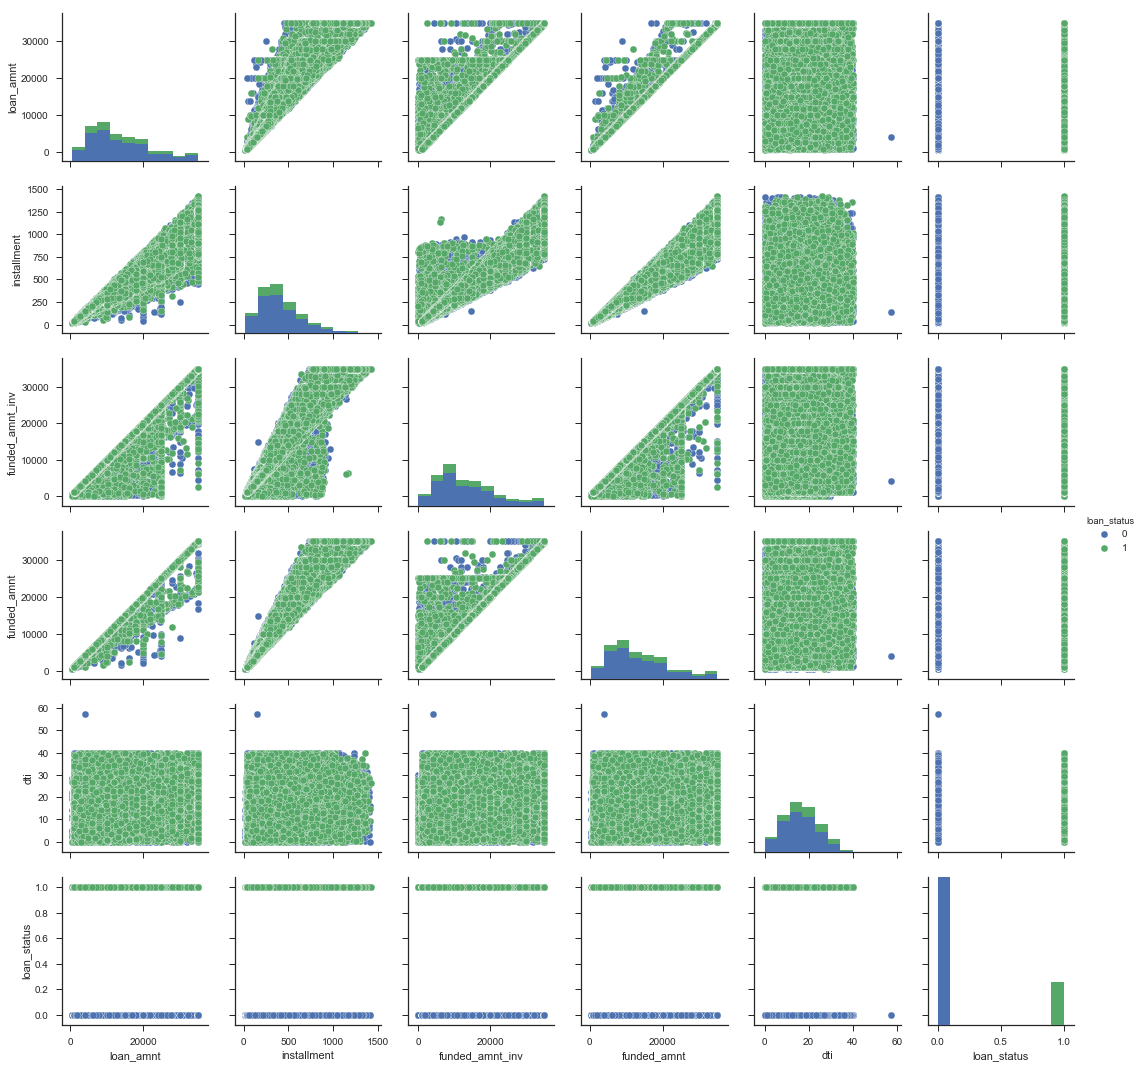

In [181]:
sns.pairplot(data=loan_check, hue = 'loan_status')

plt.show()

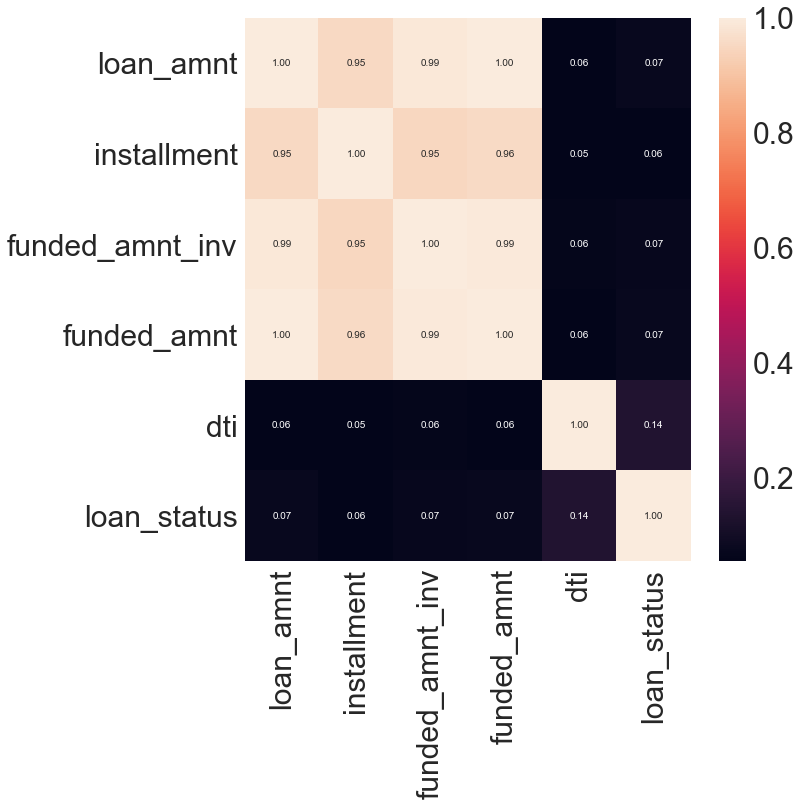

In [189]:
corrmat = loan_check.corr()
corrmat

f, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=3)
hm = sns.heatmap(corrmat, cbar=True, annot=True, fmt='.2f',
                annot_kws={'size':10})

plt.show()

* installment (월상환액) - loan_amnt (채무자가 처음 신청 한 금액) : 0.95
* installment (월상환액) - funded_amnt_inv(대출시점 투자자가 투자한 총 금액) : 0.95
* installment (월상환액) - funded_amnt (해당 시점 대출된 총 금액) : 0.96
* funded_amnt_inv(대출시점 투자자가 투자한 총 금액) - loan_amnt(채무자가 처음 신청 한 금액): 0.99
* funded_amnt_inv(대출시점 투자자가 투자한 총 금액) - funded_amnt (해당 시점 대출된 총 금액) : 0.99
<br><br>
### * 해당 변수들의 상관계수는 각 0.06~0.07이고, 변수들간의 상관관계는 강하기 때문에 일단 funded_amnt를 그대로 사용하기로 한다

## 1-2)  관계변수 생성
* loan_amnt(신청금액) 과 funded_amnt(결정된 대출금액) 간의 차이가 있는 것은 부정적인 평가가 작용했을 것으로 판단, 변수로 만들어 본다

In [194]:
loan_check = loan_check[['loan_amnt', 'funded_amnt']]
loan_check['amnt_diff'] = loan_check.loan_amnt - loan_check.funded_amnt
loan_check.amnt_diff.value_counts()

0.0        268969
5000.0         16
3625.0         13
7500.0         12
8000.0         11
3800.0         10
6000.0         10
4975.0         10
9125.0         10
25.0           10
1500.0         10
7050.0         10
2500.0         10
4400.0          9
4200.0          9
1700.0          9
7200.0          9
4000.0          9
5200.0          9
6325.0          9
4225.0          9
9275.0          9
4375.0          8
7750.0          8
1900.0          8
3150.0          8
2600.0          8
1800.0          8
7000.0          8
1925.0          8
            ...  
11050.0         1
13450.0         1
5925.0          1
10175.0         1
17975.0         1
15500.0         1
12800.0         1
13375.0         1
13325.0         1
11125.0         1
1050.0          1
8300.0          1
13250.0         1
18150.0         1
10125.0         1
18675.0         1
15200.0         1
10600.0         1
11325.0         1
12975.0         1
12925.0         1
10050.0         1
525.0           1
8250.0          1
9900.0    

In [198]:
# 비율로 한다
loan_check['amnt_diff_pro'] = loan_check.funded_amnt / loan_check.loan_amnt
loan['amnt_diff_pro'] = loan_check['amnt_diff_pro']

# 2. Feature Selection


In [199]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'grade_score', 'emp_length', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'term_ 36 months', 'term_ 60 months', 'grade_square', 'home_ANY',
       'home_MORTGAGE', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'home_score', 'source_Not Verified', 'source_Source Verified',


In [218]:
feature_list = ['funded_amnt','term', 'int_rate',
       'grade', 'grade_score', 'emp_length', 'annual_inc',
       'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'term_ 36 months', 'term_ 60 months', 'grade_square', 'home_ANY',
       'home_MORTGAGE', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'home_score', 'source_Not Verified', 'source_Source Verified',
       'source_Verified', 'initial_f', 'initial_w', 'credit_period',
       'check_desc', 'month_score', 'amnt_diff_pro']

# 제외 변수
#installment, loan_amnt ,funded_amnt_inv


In [219]:
loan.mths_since_last_record.value_counts()

0.0      237088
104.0       505
105.0       503
114.0       496
111.0       494
113.0       491
106.0       490
116.0       489
109.0       488
107.0       486
112.0       480
115.0       479
110.0       477
118.0       473
103.0       466
117.0       464
108.0       464
101.0       458
102.0       454
100.0       450
98.0        442
96.0        435
61.0        427
93.0        422
94.0        414
86.0        411
99.0        410
71.0        408
69.0        405
54.0        403
          ...  
27.0        126
26.0        106
23.0        104
25.0         99
21.0         85
22.0         77
24.0         76
18.0         72
20.0         72
15.0         68
19.0         64
17.0         61
12.0         60
16.0         54
13.0         51
14.0         51
11.0         47
7.0          44
8.0          43
9.0          40
10.0         38
6.0          26
5.0          25
4.0          19
2.0          17
3.0          13
1.0          10
120.0         2
121.0         1
129.0         1
Name: mths_since_last_re

In [220]:
loan_feature = loan[feature_list]
loan_status = loan['loan_status']

# 3. Train / Test set

### Test Set 나누기¶
별도의 test set 이 없는 관계로 30%를 추출한다

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(loan_feature, loan_status, random_state=30)

### Validation Set

In [222]:

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, random_state=30)

In [223]:
X_train_val.shape

(152373, 59)

In [224]:
X_val.shape

(50792, 59)

### Test Set 선택의 랜덤성을 막고자  pickle로 내보낸다

In [225]:

pickle.dump(X_train_val, open( "X_train_val", "wb" ) )
pickle.dump(X_val, open( "X_val", "wb" ) )

pickle.dump(y_train_val, open( "y_train_val", "wb" ) )
pickle.dump(y_val, open( "y_val", "wb" ) )

pickle.dump(X_test, open( "X_test", "wb" ) )
pickle.dump(y_test, open( "y_test", "wb" ) )

# 4. Estimate Score

## 4-1) Random Forest

In [226]:


forest = RandomForestClassifier(n_estimators=15, random_state = 2)

forest = forest.fit(X_train_val, y_train_val)

In [227]:
print ("Train set score: {:.3f}".format(forest.score(X_train_val, y_train_val)))
print ("Validation set score: {:.3f}".format(forest.score(X_val, y_val)))

Train set score: 0.993
Validation set score: 0.766


In [228]:
y_pred = forest.predict(X_val)
y_true = y_val

In [229]:
score = f1_score(y_true, y_pred)
score

0.22997733894464223

In [230]:
importances = forest.feature_importances_
importances

array([  5.19323384e-02,   3.12814948e-03,   5.03355620e-02,
         1.58623422e-02,   4.30935621e-02,   3.18416728e-02,
         5.98065199e-02,   9.60251538e-03,   2.25644682e-02,
         4.48353320e-02,   6.73437839e-02,   9.63883693e-03,
         2.15836699e-02,   3.43585848e-02,   1.18758703e-02,
         4.11803393e-02,   6.51179815e-03,   5.76673233e-02,
         5.87919463e-02,   4.78674156e-02,   1.05857238e-03,
         1.67602629e-02,   4.76299569e-04,   1.10419996e-02,
         4.88564461e-02,   1.51280738e-05,   1.38805419e-05,
         1.09527673e-05,   1.30186197e-05,   1.03939232e-05,
         8.20838766e-06,   7.07716561e-06,   7.41202190e-06,
         1.07614343e-05,   1.73181355e-05,   5.89243938e-06,
         4.59201852e-02,   1.06609429e-05,   6.66571998e-06,
         8.78008851e-06,   6.02073019e-03,   6.16807786e-03,
         1.98395487e-02,   0.00000000e+00,   4.56406781e-03,
         4.22530116e-05,   1.71618856e-04,   3.85239609e-03,
         4.84754592e-03,

In [231]:
feature_table = pd.Series(importances, index = X_train_val.columns)
feature_table.sort_values(0, ascending=False)



dti                            0.067344
annual_inc                     0.059807
revol_util                     0.058792
credit_period                  0.057815
revol_bal                      0.057667
funded_amnt                    0.051932
int_rate                       0.050336
tot_cur_bal                    0.048856
total_acc                      0.047867
total_rev_hi_lim               0.045920
addr_state                     0.044835
grade_score                    0.043094
open_acc                       0.041180
month_score                    0.036492
mths_since_last_delinq         0.034359
emp_length                     0.031842
purpose                        0.022564
inq_last_6mths                 0.021584
grade_square                   0.019840
mths_since_last_major_derog    0.016760
grade                          0.015862
mths_since_last_record         0.011876
tot_coll_amt                   0.011042
delinq_2yrs                    0.009639
verification_status            0.009603


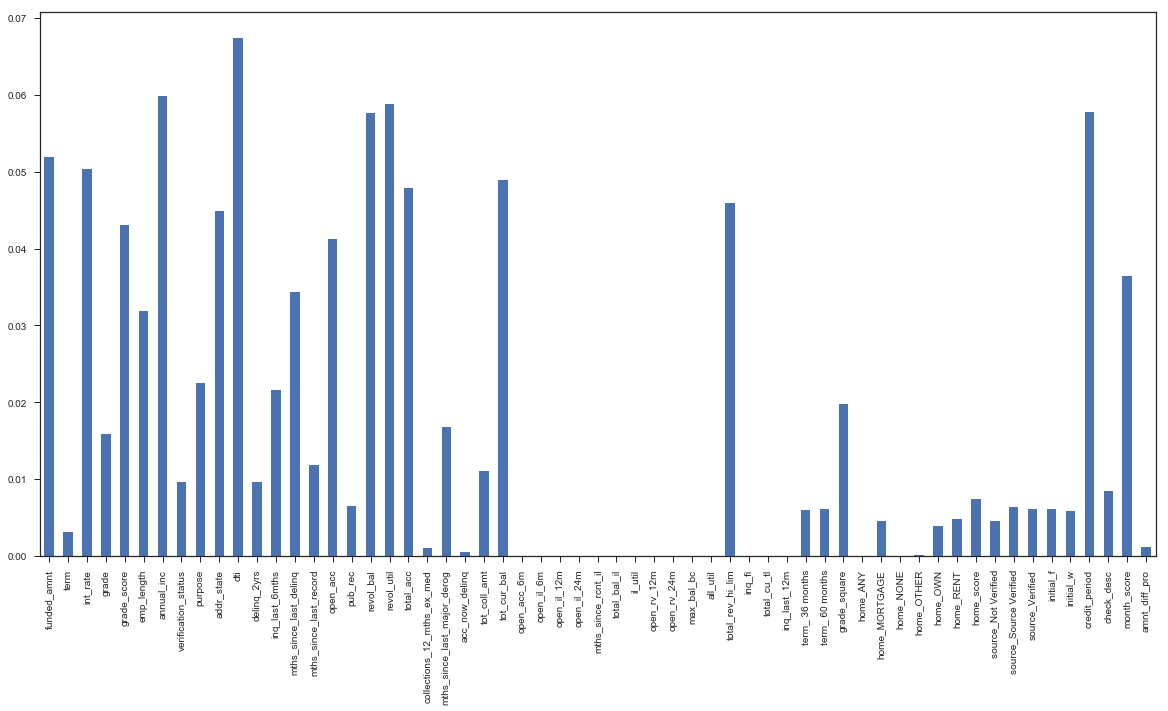

In [232]:
%matplotlib inline


plt.figure(figsize = (20, 10))
pd.Series(importances, index = X_train_val.columns).plot(kind='bar')



* 2-1) 대략적인 변수의 설명력을 파악할 수 있다, 또한 현재 상태는 과적합임을 알 수 있다

# 5. PCA
* 과적합을 줄이고자 0값이 80%가 넘는 변수는 pca로 줄일 수 있다

## 5-1) PCA Modelling

In [239]:
temp_feature = [
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [240]:
loan_temp = X_train_val[temp_feature]
loan_temp.tail()

,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
173823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261870,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133350,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5-2) PCA 평가

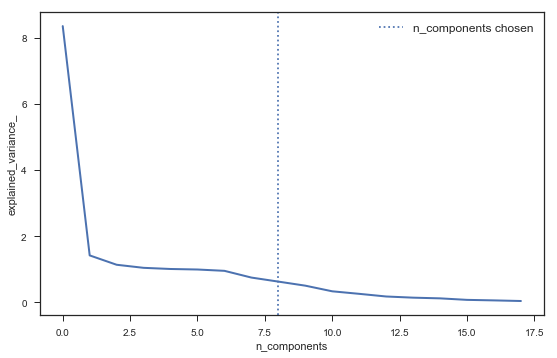

In [242]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = X_scaled
y_digits = y_train_val
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [1, 5, 8]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()



* n_components는 1개 & 8개로 비교 해 본다

### (1) Appyling X_train_val

In [246]:
#### X_train_val PCA ####

#scaling
loan_temp = X_train_val[temp_feature]

#Scaling
scaler = StandardScaler()
scaler.fit(loan_temp)
X_scaled = scaler.transform(loan_temp)

#pca
pca1 = PCA(n_components = 1) # PCA모델 만듬
pca1.fit(X_scaled)
X_pca1 = pca1.transform(X_scaled)

pca8 = PCA(n_components = 8) # PCA모델 만듬
pca8.fit(X_scaled)
X_pca8 = pca8.transform(X_scaled)

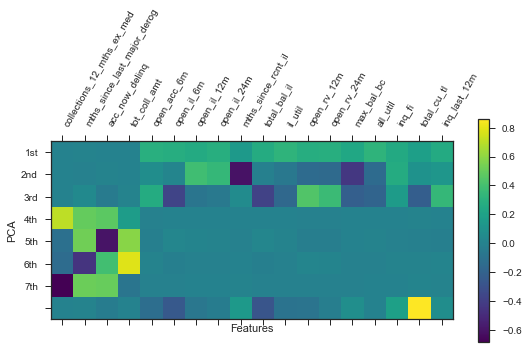

In [247]:
plt.matshow(pca8.components_, cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7], ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th'])
plt.colorbar()
plt.xticks(range(len(loan_temp.columns)), loan_temp.columns, rotation=60, ha='left' )

plt.xlabel("Features")
plt.ylabel('PCA')

plt.show()

### (2) Applying X_val

In [248]:
#### X_val PCA ####

#scaling
loan_temp = X_val[temp_feature]


scaler = StandardScaler()
scaler.fit(loan_temp)
X_scaled = scaler.transform(loan_temp)

#pca
pca1 = PCA(n_components = 1) # PCA모델 만듬
pca1.fit(X_scaled)
X_val_pca1 = pca1.transform(X_scaled)

pca8 = PCA(n_components = 8) # PCA모델 만듬
pca8.fit(X_scaled)
X_val_pca8 = pca8.transform(X_scaled)

## 5-3) PCA 변수 적용 후 평가

In [253]:
feature_pca = ['funded_amnt','term', 'int_rate',
       'grade', 'grade_score', 'emp_length', 'annual_inc',
       'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'tot_cur_bal', 'total_rev_hi_lim', 
       'term_ 36 months', 'term_ 60 months', 'grade_square', 'home_ANY',
       'home_MORTGAGE', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'home_score', 'source_Not Verified', 'source_Source Verified',
       'source_Verified', 'initial_f', 'initial_w', 'credit_period',
       'check_desc', 'month_score', 'amnt_diff_pro']


### (1) Appyling X_train_val

In [254]:
#### Appling pca to X_train_val dataframe ###

X_train_val_pca = X_train_val[feature_pca]
X_train_val_pca = X_train_val_pca.reset_index()

X_pca8 = pd.DataFrame(X_pca8)
X_pca1 = pd.DataFrame(X_pca1)

X_train_val_pca8= pd.concat([X_train_val_pca, X_pca8], axis=1)
X_train_val_pca1= pd.concat([X_train_val_pca, X_pca1], axis=1)

X_train_val_pca8.drop('index', axis = 1, inplace = True)
X_train_val_pca1.drop('index', axis = 1, inplace = True)

print ("Dataframe(X_train_val_pca8) Shape: {}". format(X_val_pca8.shape))
print ("Dataframe(X_train_val_pca1) Shape: {}". format(X_val_pca1.shape))

Dataframe(X_train_val_pca8) Shape: (50792, 49)
Dataframe(X_train_val_pca1) Shape: (50792, 42)


### (2) Applying X_val

In [252]:
X_val_pca = X_val[feature_pca]
X_val_pca = X_val_pca.reset_index()

X_val_pca8 = pd.DataFrame(X_val_pca8)
X_val_pca1 = pd.DataFrame(X_val_pca1)

X_val_pca8 = pd.concat([X_val_pca, X_val_pca8], axis=1)
X_val_pca1 = pd.concat([X_val_pca, X_val_pca1], axis=1)

X_val_pca8.drop('index', axis = 1, inplace = True)
X_val_pca1.drop('index', axis = 1, inplace = True)

print ("Dataframe(X_val_pca8) Shape: {}". format(X_val_pca8.shape))
print ("Dataframe(X_val_pca1) Shape: {}". format(X_val_pca1.shape))

Dataframe(X_val_pca8) Shape: (50792, 49)
Dataframe(X_val_pca1) Shape: (50792, 42)


## 5-4) Random Forest 로 대략적 평가

### (1) PCA 8인 경우

In [255]:

forest8 = RandomForestClassifier(n_estimators=15, random_state = 2)
forest8 = forest8.fit(X_train_val_pca8, y_train_val)
print ("Train set score: {:.3f}".format(forest8.score(X_train_val_pca8, y_train_val)))
print ("Validation set score: {:.3f}".format(forest8.score(X_val_pca8, y_val)))

y_pred = forest8.predict(X_val_pca8)
y_true = y_val

score = f1_score(y_true, y_pred)
print ("F1 score is : {:.3f}.".format(score))

Train set score: 0.994
Validation set score: 0.757
F1 score is : 0.269.


### (2) PCA 1인 경우

In [256]:
forest1 = RandomForestClassifier(n_estimators=15,random_state = 2)
forest1 = forest1.fit(X_train_val_pca1, y_train_val)
print ("Train set score: {:.3f}".format(forest1.score(X_train_val_pca1, y_train_val)))
print ("Validation set score: {:.3f}".format(forest1.score(X_val_pca1, y_val)))

y_pred = forest1.predict(X_val_pca1)
y_true = y_val

score = f1_score(y_true, y_pred)
print ("F1 score is : {:.3f}.".format(score))

Train set score: 0.994
Validation set score: 0.765
F1 score is : 0.243.


### (3) 중요한 변수

In [257]:
importances8 = forest8.feature_importances_
feature_table8 = pd.Series(importances8, index = X_train_val_pca8.columns)
feature_table8.sort_values(0, ascending=False)

dti                       0.066570
annual_inc                0.057413
credit_period             0.057115
revol_util                0.056991
revol_bal                 0.054326
int_rate                  0.051399
funded_amnt               0.050039
tot_cur_bal               0.046561
total_acc                 0.046121
total_rev_hi_lim          0.045371
addr_state                0.042513
open_acc                  0.038765
grade_score               0.037546
month_score               0.033815
mths_since_last_delinq    0.030466
emp_length                0.029255
purpose                   0.020468
inq_last_6mths            0.019753
grade_square              0.018591
grade                     0.016429
6                         0.010959
5                         0.010680
mths_since_last_record    0.010520
7                         0.009946
verification_status       0.009509
1                         0.009392
4                         0.009378
2                         0.009206
3                   

In [258]:
importances1 = forest1.feature_importances_
feature_table1 = pd.Series(importances1, index = X_train_val_pca1.columns)
feature_table1.sort_values(0, ascending=False)

dti                       0.068772
annual_inc                0.061070
revol_util                0.060544
credit_period             0.059191
revol_bal                 0.058652
int_rate                  0.053985
funded_amnt               0.052414
tot_cur_bal               0.051428
total_acc                 0.049509
total_rev_hi_lim          0.048131
addr_state                0.045073
open_acc                  0.041945
month_score               0.036283
mths_since_last_delinq    0.034837
grade_score               0.034577
emp_length                0.031287
grade                     0.022393
purpose                   0.022067
inq_last_6mths            0.021486
0                         0.018953
grade_square              0.017334
mths_since_last_record    0.012102
delinq_2yrs               0.009756
verification_status       0.009747
check_desc                0.007312
home_score                0.007034
source_Source Verified    0.006661
pub_rec                   0.006262
source_Verified     

## 2-5) Random Forest 로 대략적 평가 (Proba)

In [263]:
y_pred = forest8.predict_proba(X_val_pca8)
y_true = y_val
i = 0
pred_random=[]
THRESHOLD = 0.2
for val in y_pred:
    if val[1] > THRESHOLD:
        pred_random.append(1)
    elif val[1] <= THRESHOLD:
        pred_random.append(0)
    i+=1

pred_random


score = f1_score(y_true, pred_random)
print ("F1 score is : {:.3f}.".format(score))


F1 score is : 0.420.


# 6. 과적합

* 과적합 관련하여 상환비율로 점수를 준 더미변수를 제외 해 본다

In [269]:
feature_pca_deduct = ['funded_amnt','term', 'int_rate',
       'grade', 'grade_score', 'emp_length', 'annual_inc',
       'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'tot_cur_bal', 'total_rev_hi_lim', 
       'grade_square', 
       'home_score', 'initial_f', 'initial_w', 'credit_period',
       'check_desc', 'month_score', 'amnt_diff_pro']


In [283]:

X_train_val_deduct = X_train_val[feature_pca_deduct]
X_train_val_deduct = X_train_val_deduct.reset_index()

X_pca8 = pd.DataFrame(X_pca8)


X_train_val_deduct= pd.concat([X_train_val_deduct, X_pca8], axis=1)


X_train_val_deduct.drop('index', axis = 1, inplace = True)


print ("Dataframe(X_train_val_deduct) Shape: {}". format(X_train_val_deduct.shape))


Dataframe(X_train_val_deduct) Shape: (152373, 38)


In [293]:

X_val_deduct = X_val[feature_pca_deduct]
X_val_deduct = X_val_deduct.reset_index()


X_val_pca8 = pd.DataFrame(X_val_pca8)

X_val_deduct= pd.concat([X_val_deduct,X_val_pca8], axis=1)


X_val_deduct.drop('index', axis = 1, inplace = True)


print ("Dataframe(X_val_deduct) Shape: {}". format(X_val_deduct.shape))


Dataframe(X_val_deduct) Shape: (50792, 38)


In [294]:

forest_deduct = RandomForestClassifier(n_estimators=15, random_state = 2)
forest_deduct = forest_deduct.fit(X_train_val_deduct, y_train_val)
print ("Train set score: {:.3f}".format(forest_deduct.score(X_train_val_deduct, y_train_val)))
print ("Validation set score: {:.3f}".format(forest_deduct.score(X_val_deduct, y_val)))

y_pred = forest_deduct.predict(X_val_deduct)
y_true = y_val

score = f1_score(y_true, y_pred)
print ("F1 score is : {:.3f}.".format(score))

Train set score: 0.994
Validation set score: 0.753
F1 score is : 0.263.


In [295]:
y_pred = forest_deduct.predict_proba(X_val_deduct)
y_true = y_val
i = 0
pred_random=[]
THRESHOLD = 0.2
for val in y_pred:
    if val[1] > THRESHOLD:
        pred_random.append(1)
    elif val[1] <= THRESHOLD:
        pred_random.append(0)
    i+=1

pred_random


score = f1_score(y_true, pred_random)
print ("F1 score is : {:.3f}.".format(score))


F1 score is : 0.419.


#### 차이가 없으므로 제외하는 것으로 한다

# Applying Test set
* Test set 에도 변수적용을 똑같이 한다 (columns = 38)

In [310]:
feature_pca_deduct = ['funded_amnt','term', 'int_rate',
       'grade', 'grade_score', 'emp_length', 'annual_inc',
       'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'tot_cur_bal', 'total_rev_hi_lim', 
       'grade_square', 
       'home_score', 'initial_f', 'initial_w', 'credit_period',
       'check_desc', 'month_score', 'amnt_diff_pro']


In [311]:
X_test_deduct = X_test[feature_pca_deduct]
X_test_deduct = X_test_deduct.reset_index()

In [312]:

#Scaling
scaler = StandardScaler()
scaler.fit(X_test_deduct)
X_test_scaled = scaler.transform(X_test_deduct)

#pca

pca8 = PCA(n_components = 8) # PCA모델 만듬
pca8.fit(X_test_scaled)
X_test_pca8 = pca8.transform(X_test_scaled)


In [313]:

X_test_pca8 = pd.DataFrame(X_test_pca8)

X_test_deduct= pd.concat([X_test_deduct,X_test_pca8], axis=1)

X_test_deduct.drop('index', axis = 1, inplace = True)



print ("Dataframe(X_test_deduct) Shape: {}". format(X_test_deduct.shape))

Dataframe(X_test_deduct) Shape: (67722, 38)


# 7. Pickle

In [316]:

pickle.dump(X_train_val_deduct, open( "X_train_val2", "wb" ) )
pickle.dump(X_val_deduct, open( "X_val2", "wb" ) )

pickle.dump(y_train_val, open( "y_train_val2", "wb" ) )
pickle.dump(y_val, open( "y_val2", "wb" ) )

pickle.dump(X_test_deduct, open( "X_test2", "wb" ) )
pickle.dump(y_test, open( "y_test2", "wb" ) )